In [97]:
import re
import pandas as pd
#from sklearn.model_selection import train_test_split

# Load the CSV file into a DataFrame
short = pd.read_csv('../unique_sequences_not_in_df.csv')
# Keep only the SEQUENCE column and add class = 1
#short = short[['SEQUENCE']].copy()
short['Class'] = 1
#short = short.rename(columns={'SEQUENCE': 'Sequence'})

# Apply length filter
pos = short[
    (short['Sequence'].str.len() > 6) &
    (short['Sequence'].str.len() < 40)
]
# Keep only sequences with standard uppercase amino-acid letters
pos = pos[pos['Sequence'].str.match(r'^[A-Z]+$')]
# Define allowed amino acids (20 canonical)
allowed = "ACDEFGHIKLMNPQRSTVWY"
pattern = f'^[{allowed}]+$'

# Keep only sequences with standard amino acids
pos = pos[pos['Sequence'].str.match(pattern)]
pos



,Sequence,Class
0,WRIRRRWPRLPRPRWRPLPFPR,1
1,RLLRLLLLRLLR,1
2,RLLRLLLRLLR,1
3,KLVHRARRIQFFLSQNFH,1
4,LCTYNVKPDLQRFELYFLGTVTCP,1
...,...,...
190,WRIRRRWPRLPRPRWRPRFPPPFPIPR,1
191,WRIRRRWPRLPRPRWRPWFPPR,1
192,WRIRRRWPRLPRPRWRPWFPPRFPIPR,1
193,FIGGLLKTLTSFF,1


In [98]:
import pandas as pd

# Assuming 'cleaned_df' is your DataFrame

# Function to calculate length of peptide sequence
def calculate_length(sequence):
    return len(sequence)

# Create a new DataFrame with the same data as 'cleaned_df'
#df9 = cleaned_df.copy()

# Apply the function to each row in the DataFrame and create a new column 'Peptide_Length'
pos['Peptide_Length'] = pos['Sequence'].apply(calculate_length)
pos

,Sequence,Class,Peptide_Length
0,WRIRRRWPRLPRPRWRPLPFPR,1,22
1,RLLRLLLLRLLR,1,12
2,RLLRLLLRLLR,1,11
3,KLVHRARRIQFFLSQNFH,1,18
4,LCTYNVKPDLQRFELYFLGTVTCP,1,24
...,...,...,...
190,WRIRRRWPRLPRPRWRPRFPPPFPIPR,1,27
191,WRIRRRWPRLPRPRWRPWFPPR,1,22
192,WRIRRRWPRLPRPRWRPWFPPRFPIPR,1,27
193,FIGGLLKTLTSFF,1,13


In [99]:
import pandas as pd
import peptides

# Assuming you have a DataFrame named 'df' with a 'Sequence' column

# Define the peptide descriptors you want to calculate
descriptors = [
    'charge'
]

# Create a dictionary to store descriptor values
descriptor_values_dict = {}

# Iterate through each descriptor and calculate values for each sequence
for descriptor in descriptors:
    descriptor_values = []
    for sequence in pos['Sequence']:
        peptide = peptides.Peptide(sequence)
        value = getattr(peptide, descriptor)()
        descriptor_values.append(value)
    descriptor_values_dict[descriptor] = descriptor_values

# Create a new DataFrame using the descriptor values dictionary
descriptors = pd.DataFrame(descriptor_values_dict)
descriptors

,charge
0,8.997954
1,3.997971
2,3.997971
3,4.179498
4,-0.125743
...,...
190,9.997951
191,8.997954
192,9.997951
193,0.997689


In [100]:
combined_df = pd.concat([pos.reset_index(drop=True), descriptors.reset_index(drop=True)], axis=1)
combined_df
combined_df

,Sequence,Class,Peptide_Length,charge
0,WRIRRRWPRLPRPRWRPLPFPR,1,22,8.997954
1,RLLRLLLLRLLR,1,12,3.997971
2,RLLRLLLRLLR,1,11,3.997971
3,KLVHRARRIQFFLSQNFH,1,18,4.179498
4,LCTYNVKPDLQRFELYFLGTVTCP,1,24,-0.125743
...,...,...,...,...
190,WRIRRRWPRLPRPRWRPRFPPPFPIPR,1,27,9.997951
191,WRIRRRWPRLPRPRWRPWFPPR,1,22,8.997954
192,WRIRRRWPRLPRPRWRPWFPPRFPIPR,1,27,9.997951
193,FIGGLLKTLTSFF,1,13,0.997689


In [101]:
# Function to calculate charge per peptide length
def calculate_charge_per_length(charge, length):
    if length != 0:
        return charge / length
    else:
        return 0  # Handle division by zero case if necessary

# Apply the function to each row in the DataFrame and create a new column 'Charge_Per_Length'
combined_df['Charge_Per_Length'] = combined_df.apply(lambda row: calculate_charge_per_length(row['charge'], row['Peptide_Length']), axis=1)

combined_df

,Sequence,Class,Peptide_Length,charge,Charge_Per_Length
0,WRIRRRWPRLPRPRWRPLPFPR,1,22,8.997954,0.408998
1,RLLRLLLLRLLR,1,12,3.997971,0.333164
2,RLLRLLLRLLR,1,11,3.997971,0.363452
3,KLVHRARRIQFFLSQNFH,1,18,4.179498,0.232194
4,LCTYNVKPDLQRFELYFLGTVTCP,1,24,-0.125743,-0.005239
...,...,...,...,...,...
190,WRIRRRWPRLPRPRWRPRFPPPFPIPR,1,27,9.997951,0.370294
191,WRIRRRWPRLPRPRWRPWFPPR,1,22,8.997954,0.408998
192,WRIRRRWPRLPRPRWRPWFPPRFPIPR,1,27,9.997951,0.370294
193,FIGGLLKTLTSFF,1,13,0.997689,0.076745


In [102]:
subset_between = combined_df[(combined_df['Charge_Per_Length'] > 0.25) & (combined_df['Charge_Per_Length'] < 0.75)]
subset_between


,Sequence,Class,Peptide_Length,charge,Charge_Per_Length
0,WRIRRRWPRLPRPRWRPLPFPR,1,22,8.997954,0.408998
1,RLLRLLLLRLLR,1,12,3.997971,0.333164
2,RLLRLLLRLLR,1,11,3.997971,0.363452
18,RRWFKIRMAAKLA,1,13,4.997384,0.384414
19,AIPKRLRRFYLRALARRL,1,18,6.996819,0.388712
...,...,...,...,...,...
189,WRIRRRWPRLPRPRWRPRFPPP,1,22,8.997954,0.408998
190,WRIRRRWPRLPRPRWRPRFPPPFPIPR,1,27,9.997951,0.370294
191,WRIRRRWPRLPRPRWRPWFPPR,1,22,8.997954,0.408998
192,WRIRRRWPRLPRPRWRPWFPPRFPIPR,1,27,9.997951,0.370294


In [157]:
kk = pd.read_csv('../neg-high-charge-density22.csv')

# Drop unwanted index column if present
kk = kk.drop(columns=['Unnamed: 0'], errors='ignore')

kk['Class'] = 0

neg = kk[
    (kk['Sequence'].str.len() > 6) &
    (kk['Sequence'].str.len() < 40)
]


neg = neg.sample(n=111, random_state=42)

neg


,Sequence,Class
2403,QFRGRYHRL,0
1911,SGRKKKVPSSIA,0
961,RKLILRYTHKYRLGLWRPRAEPMKS,0
2349,RRKNKISIWKNKTSIKVEILFFYKP,0
4087,FEKIKIKIKLNKKRKPTEAVNYLGYKKAT,0
...,...,...
23,GHKLGEFSPTRTFRGHAKKDKKIQKK,0
2347,KKKLNKVLPYREISNEKTYSRSR,0
747,AFLWRHRVRQNAHFKRYR,0
3937,PKAIKLKV,0


In [158]:
concatenated_df = pd.concat([subset_between,neg], ignore_index=True)
concatenated_df = concatenated_df.drop_duplicates(subset='Sequence', keep=False)
concatenated_df = concatenated_df.reset_index(drop=True)
cols_to_drop = ['Peptide_Length', 'charge', 'Charge_Per_Length']
concatenated_df = concatenated_df.drop(columns=cols_to_drop)
concatenated_df


,Sequence,Class
0,WRIRRRWPRLPRPRWRPLPFPR,1
1,RLLRLLLLRLLR,1
2,RLLRLLLRLLR,1
3,RRWFKIRMAAKLA,1
4,AIPKRLRRFYLRALARRL,1
...,...,...
217,GHKLGEFSPTRTFRGHAKKDKKIQKK,0
218,KKKLNKVLPYREISNEKTYSRSR,0
219,AFLWRHRVRQNAHFKRYR,0
220,PKAIKLKV,0


In [159]:
import requests
import os
import time
import pandas as pd

# Configuration
OUTPUT_DIR = "new2//"
SLEEP_TIME = 5  # Seconds between requests
MAX_RETRIES = 3  # Retry attempts for failed requests
START_INDEX = 112  # <-- Change here to resume

# Create the output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

def get_pdb_from_sequence(seq, out_file_path):
    """Get PDB structure from ESM Atlas API for a given amino acid sequence"""
    url = "https://api.esmatlas.com/foldSequence/v1/pdb/"
    headers = {
        "Content-Type": "text/plain"
    }

    # Sanitize sequence
    clean_seq = ''.join(filter(str.isalpha, seq)).upper()

    for attempt in range(MAX_RETRIES):
        try:
            response = requests.post(url, data=clean_seq, headers=headers, timeout=30)
            if response.ok:
                with open(out_file_path, "w") as f:
                    f.write(response.text)
                return True
            else:
                print(f"Attempt {attempt + 1} failed for {clean_seq[:10]}... "
                      f"Status: {response.status_code}, Response: {response.text[:100]}")
                if response.status_code == 429:
                    time.sleep(SLEEP_TIME * (attempt + 2))  # Exponential backoff
        except Exception as e:
            print(f"Attempt {attempt + 1} error: {str(e)}")
            time.sleep(SLEEP_TIME)

    return False

# Initialize PDB_File column if missing
if 'PDB_File' not in concatenated_df.columns:
    concatenated_df['PDB_File'] = [None] * len(concatenated_df)

# Process each sequence from START_INDEX onward
for idx in range(START_INDEX, len(concatenated_df)):
    seq = concatenated_df.at[idx, 'Sequence']
    filename = f"peptide_{idx}.pdb"
    file_path = os.path.join(OUTPUT_DIR, filename)

    print(f"Processing sequence {idx + 1}/{len(concatenated_df)}: {seq[:15]}...")

    # Skip if already exists (optional)
    if os.path.exists(file_path):
        print(f"Already exists: {file_path}")
        concatenated_df.at[idx, 'PDB_File'] = file_path
        continue

    success = get_pdb_from_sequence(seq, file_path)
    if success:
        print(f"Successfully saved: {file_path}")
        concatenated_df.at[idx, 'PDB_File'] = file_path
    else:
        print(f"Failed to get PDB for index {idx}")
        concatenated_df.at[idx, 'PDB_File'] = None

    time.sleep(SLEEP_TIME)



Processing sequence 113/222: SGRKKKVPSSIA...
Already exists: new2//peptide_112.pdb
Processing sequence 114/222: RKLILRYTHKYRLGL...
Already exists: new2//peptide_113.pdb
Processing sequence 115/222: RRKNKISIWKNKTSI...
Already exists: new2//peptide_114.pdb
Processing sequence 116/222: FEKIKIKIKLNKKRK...
Already exists: new2//peptide_115.pdb
Processing sequence 117/222: GKKSYDKRESIKQKD...
Already exists: new2//peptide_116.pdb
Processing sequence 118/222: GNPKKARSTFQ...
Already exists: new2//peptide_117.pdb
Processing sequence 119/222: AKALGKRLRIKGRFQ...
Already exists: new2//peptide_118.pdb
Processing sequence 120/222: KTCIAQIIIKQAKTS...
Already exists: new2//peptide_119.pdb
Processing sequence 121/222: RSRSRSRSPSRSRSP...
Already exists: new2//peptide_120.pdb
Processing sequence 122/222: RTPWGKPTLGKRTRR...
Already exists: new2//peptide_121.pdb
Processing sequence 123/222: NKKNKKRYRKNKKIK...
Already exists: new2//peptide_122.pdb
Processing sequence 124/222: VFRRSRLVIFGKGKK...
Already exist

In [160]:
import os

OUTPUT_DIR = "new//"
existing_files = os.listdir(OUTPUT_DIR)

for file in existing_files:
    if file.endswith(".pdb") and file.startswith("peptide_"):
        try:
            idx = int(file.replace("peptide_", "").replace(".pdb", ""))
            file_path = os.path.join(OUTPUT_DIR, file)
            if 0 <= idx < len(concatenated_df):
                concatenated_df.at[idx, 'PDB_File'] = file_path
        except ValueError:
            continue  # In case there's a filename that doesn't match the pattern


concatenated_df.to_csv("peptides_with_pdb_paths_fixed.csv", index=False)
print("✅ PDB_File column updated from existing files.")
concatenated_df

✅ PDB_File column updated from existing files.


,Sequence,Class,PDB_File
0,WRIRRRWPRLPRPRWRPLPFPR,1,new//peptide_0.pdb
1,RLLRLLLLRLLR,1,new//peptide_1.pdb
2,RLLRLLLRLLR,1,new//peptide_2.pdb
3,RRWFKIRMAAKLA,1,new//peptide_3.pdb
4,AIPKRLRRFYLRALARRL,1,new//peptide_4.pdb
...,...,...,...
217,GHKLGEFSPTRTFRGHAKKDKKIQKK,0,new//peptide_217.pdb
218,KKKLNKVLPYREISNEKTYSRSR,0,new//peptide_218.pdb
219,AFLWRHRVRQNAHFKRYR,0,new//peptide_219.pdb
220,PKAIKLKV,0,new//peptide_220.pdb


In [161]:
from Bio.PDB import PDBParser, DSSP
import pandas as pd
import numpy as np
import os

# Path to folder containing PDB files
pdb_directory = "new/./"  # Adjust if needed

# Initialize DSSP feature columns
dssp_columns = ['Mean_RSA', 'Mean_Phi', 'Mean_Psi']
for col in dssp_columns:
    concatenated_df[col] = np.nan

parser = PDBParser(QUIET=True)

# Loop to calculate RSA, Phi, Psi features
for idx in concatenated_df.index:
    pdb_filename = f"peptide_{idx}.pdb"
    pdb_path = os.path.join(pdb_directory, pdb_filename)

    if not os.path.exists(pdb_path):
        print(f"File not found: {pdb_path}")
        continue

    try:
        structure = parser.get_structure(f"pep_{idx}", pdb_path)
        model = structure[0]
        dssp = DSSP(model, pdb_path)

        rsa_list = []
        phi_list = []
        psi_list = []

        for res in dssp:
            rsa = res[3]
            phi = res[4]
            psi = res[5]

            rsa_list.append(rsa)
            phi_list.append(phi)
            psi_list.append(psi)

        # Compute means
        concatenated_df.at[idx, 'Mean_RSA'] = np.mean(rsa_list) if rsa_list else np.nan
        concatenated_df.at[idx, 'Mean_Phi'] = np.mean(phi_list) if phi_list else np.nan
        concatenated_df.at[idx, 'Mean_Psi'] = np.mean(psi_list) if psi_list else np.nan

    except Exception as e:
        print(f"Error processing index {idx} - file: {pdb_path}: {e}")


In [138]:
from Bio.PDB import PDBParser, DSSP
import os

# Columns to store DSSP secondary structure percentages
helices = []
sheets = []
coils = []

parser = PDBParser()

for idx in concatenated_df.index:
    pdb_file = f"new2/peptide_{idx}.pdb"
    try:
        structure = parser.get_structure(f"pep_{idx}", pdb_file)
        model = structure[0]
        dssp = DSSP(model, pdb_file)
        
        ss_list = [dssp[key][2] for key in dssp.keys()]
        total = len(ss_list)
        
        helix_count = sum(s in "HGI" for s in ss_list)
        sheet_count = sum(s in "BE" for s in ss_list)
        coil_count  = sum(s in "ST " for s in ss_list)  # includes turn, bend, and loops
        
        helices.append(helix_count / total * 100)
        sheets.append(sheet_count / total * 100)
        coils.append(coil_count / total * 100)
    except Exception as e:
        print(f"Failed to process {pdb_file}: {e}")
        helices.append(None)
        sheets.append(None)
        coils.append(None)

# Add DSSP % columns to DataFrame
concatenated_df['%Helix'] = helices
concatenated_df['%Sheet'] = sheets
concatenated_df['%Coil'] = coils

In [112]:
import mdtraj as md
import pandas as pd
import numpy as np
import os

# Folder containing your PDBs
pdb_folder = 'new/'

# Initialize columns
concatenated_df['RoG'] = np.nan
concatenated_df['SASA'] = np.nan
concatenated_df['Compactness'] = np.nan

# Loop through each peptide
for idx in concatenated_df.index:
    pdb_path = os.path.join(pdb_folder, f"peptide_{idx}.pdb")

    if not os.path.exists(pdb_path):
        print(f"Missing: {pdb_path}")
        continue

    try:
        traj = md.load(pdb_path)
        
        # Radius of Gyration (RoG)
        rog = md.compute_rg(traj)[0]
        concatenated_df.at[idx, 'RoG'] = rog

        # Solvent Accessible Surface Area (SASA)
        sasa = md.shrake_rupley(traj)[0].sum()
        concatenated_df.at[idx, 'SASA'] = sasa

        # Compactness = Mass / SASA (or optionally 1/SASA per atom)
        n_atoms = traj.n_atoms
        compactness = n_atoms / sasa if sasa > 0 else np.nan
        concatenated_df.at[idx, 'Compactness'] = compactness

    except Exception as e:
        print(f"Error at index {idx}: {e}")


In [162]:
cleaned_df = concatenated_df
cleaned_df
# Remove sequences that contain "RLYR"

cleaned_df

,Sequence,Class,PDB_File,Mean_RSA,Mean_Phi,Mean_Psi
0,WRIRRRWPRLPRPRWRPLPFPR,1,new//peptide_0.pdb,0.721473,-32.850000,-4.933333
1,RLLRLLLLRLLR,1,new//peptide_1.pdb,0.764684,-56.111111,104.311111
2,RLLRLLLRLLR,1,new//peptide_2.pdb,0.634035,-45.359091,-24.831818
3,RRWFKIRMAAKLA,1,new//peptide_3.pdb,0.679282,-43.845455,-13.150000
4,AIPKRLRRFYLRALARRL,1,new//peptide_4.pdb,0.901021,-43.425000,130.000000
...,...,...,...,...,...,...
217,GHKLGEFSPTRTFRGHAKKDKKIQKK,0,new//peptide_217.pdb,0.849023,-33.590909,100.209091
218,KKKLNKVLPYREISNEKTYSRSR,0,new//peptide_218.pdb,0.715614,-45.395000,0.950000
219,AFLWRHRVRQNAHFKRYR,0,new//peptide_219.pdb,0.661737,-43.976190,-21.942857
220,PKAIKLKV,0,new//peptide_220.pdb,0.799683,-22.255556,87.044444


In [164]:
import pandas as pd
import peptides



# Define the peptide descriptors you want to calculate
descriptors = [
    'frequencies',
    'aliphatic_index',
    'boman',
    'charge',
    'isoelectric_point',
    'hydrophobic_moment',
    'hydrophobicity',
    'instability_index',
    'mass_shift',
    'molecular_weight',
    'mz',
    'structural_class'
]

# Create a dictionary to store descriptor values
descriptor_values_dict = {}

# Iterate through each descriptor and calculate values for each sequence
for descriptor in descriptors:
    descriptor_values = []
    for sequence in cleaned_df['Sequence']:
        peptide = peptides.Peptide(sequence)
        value = getattr(peptide, descriptor)()
        descriptor_values.append(value)
    descriptor_values_dict[descriptor] = descriptor_values

# Create a new DataFrame using the descriptor values dictionary
descriptors = pd.DataFrame(descriptor_values_dict)

In [165]:
import pandas as pd


# containing dictionaries of amino acid frequencies

# Expand 'frequencies' column into separate columns
amino_acid_frequencies = pd.DataFrame(descriptors['frequencies'].tolist()).fillna(0)

# Combine the expanded DataFrame with the original DataFrame
descriptors_df = pd.concat([descriptors, amino_acid_frequencies], axis=1)

# Drop the original 'frequencies' column
descriptors_df.drop(columns=['frequencies'], inplace=True)

# Display the resulting DataFrame
descriptors_df

,aliphatic_index,boman,charge,isoelectric_point,hydrophobic_moment,hydrophobicity,instability_index,mass_shift,molecular_weight,mz,structural_class,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V,O,U,B,Z,J,X
0,53.181818,4.979545,8.997954,13.403098,0.941516,-1.722727,152.509091,54.181161,3051.69734,1525.905091,alpha_beta,0.000000,0.409091,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.045455,0.090909,0.000000,0.000000,0.045455,0.272727,0.000000,0.000000,0.136364,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,260.000000,1.693333,3.997971,12.977146,0.532111,1.033333,57.316667,24.080516,1548.04044,774.551016,alpha,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,248.181818,2.294545,3.997971,12.977146,1.091537,0.781818,61.618182,24.080516,1434.88104,718.008986,alpha,0.000000,0.363636,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,83.076923,2.533077,4.997384,12.813636,0.329407,-0.292308,82.223077,30.100645,1647.06354,823.993011,alpha_beta,0.230769,0.230769,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.153846,0.076923,0.076923,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,125.000000,3.455556,6.996819,12.804887,0.761116,-0.327778,129.111111,42.140903,2269.81704,1135.221431,beta,0.166667,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.055556,0.222222,0.055556,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.055556,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,33.846154,3.353462,7.179952,11.493842,0.579457,-1.634615,24.407692,54.181161,3023.53754,1511.862281,alpha,0.038462,0.076923,0.000000,0.038462,0.0,0.038462,0.038462,0.115385,0.076923,0.038462,0.038462,0.269231,0.000000,0.076923,0.038462,0.038462,0.076923,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
218,63.478261,4.072174,5.998349,11.020675,0.355112,-1.652174,57.726087,48.161032,2838.30604,1419.309031,beta,0.000000,0.130435,0.086957,0.000000,0.0,0.000000,0.086957,0.000000,0.000000,0.043478,0.086957,0.217391,0.000000,0.000000,0.043478,0.130435,0.043478,0.000000,0.086957,0.043478,0.0,0.0,0.0,0.0,0.0,0.0
219,48.888889,4.495556,6.178640,12.681765,0.326550,-1.377778,29.700000,36.120774,2441.83554,1221.175551,alpha,0.111111,0.277778,0.055556,0.000000,0.0,0.055556,0.000000,0.000000,0.111111,0.000000,0.055556,0.055556,0.000000,0.111111,0.000000,0.000000,0.000000,0.055556,0.055556,0.055556,0.0,0.0,0.0,0.0,0.0,0.0
220,146.250000,0.120000,2.997099,11.103071,0.282060,0.125000,-33.700000,18.060387,896.18444,448.818196,alpha+beta,0.125000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.375000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem


# Create a new DataFrame to store the results
d4 = pd.DataFrame()

def calculate_tpsa(peptide_sequence):
    # Create a molecule object from the peptide sequence
    peptide_molecule = Chem.MolFromSequence(peptide_sequence)

    if peptide_molecule is not None:
        # Calculate TPSA using AllChem method
        tpsa = AllChem.CalcTPSA(peptide_molecule)

        return tpsa
    else:
        print(f"Invalid peptide sequence: {peptide_sequence}")
        return None

# Apply the function to the 'Sequence' column and create a new 'TPSA' column
#new_pos['Sequence'] = cleaned_df['Sequence']
d4['TPSA'] = cleaned_df['Sequence'].apply(calculate_tpsa)

# Display the new DataFrame with TPSA values
d4

,TPSA
0,1226.15
1,631.02
2,601.92
3,666.05
4,966.88
...,...
217,1323.71
218,1292.69
219,1073.10
220,331.09


In [167]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Crippen, Lipinski, Descriptors


# Create a new DataFrame to store the results
d6 = pd.DataFrame()

def calculate_descriptors(peptide_sequence):
    # Create a molecule object from the peptide sequence
    peptide_molecule = Chem.MolFromSequence(peptide_sequence)

    if peptide_molecule is not None:
        # Calculate various molecular descriptors
        heavy_atom_count = Descriptors.HeavyAtomCount(peptide_molecule)
        logp = Crippen.MolLogP(peptide_molecule)
        mol_logp = Crippen.MolLogP(peptide_molecule)
        # MolLogS calculation is not directly available in RDKit, consider using other methods/tools
        fraction_csp3 = Lipinski.FractionCSP3(peptide_molecule)
        bertz_ct = Descriptors.BertzCT(peptide_molecule)

        return heavy_atom_count, logp, mol_logp, fraction_csp3, bertz_ct
    else:
        print(f"Invalid peptide sequence: {peptide_sequence}")
        return None

# Apply the function to the 'Sequence' column and create new columns for descriptors
#new_pos['Sequence'] = cleaned_df['Sequence']
d6[['HeavyAtomCount', 'LogP', 'MolLogP', 'FractionCSP3', 'BertzCT']] = cleaned_df['Sequence'].apply(calculate_descriptors).apply(pd.Series)

# Display the new DataFrame with descriptor values
d6

,HeavyAtomCount,LogP,MolLogP,FractionCSP3,BertzCT
0,219.0,-5.46127,-5.46127,0.576389,8607.970640
1,109.0,-0.84702,-0.84702,0.777778,2949.930487
2,101.0,-1.37792,-1.37792,0.772727,2696.020238
3,116.0,-2.86459,-2.86459,0.605263,3723.303830
4,161.0,-5.66408,-5.66408,0.653846,5177.175695
...,...,...,...,...,...
217,214.0,-13.76376,-13.76376,0.637037,7317.084578
218,200.0,-13.46609,-13.46609,0.664000,6594.164121
219,175.0,-7.94265,-7.94265,0.491071,6628.551459
220,63.0,-0.62830,-0.62830,0.813953,1460.975314


In [168]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Lipinski, Descriptors


# Create a new DataFrame to store the results
d7 = pd.DataFrame()

def calculate_polarity(peptide_sequence):
    # Create a molecule object from the peptide sequence
    peptide_molecule = Chem.MolFromSequence(peptide_sequence)

    if peptide_molecule is not None:
        # Calculate descriptors related to polarity
        num_h_acceptors = Lipinski.NumHAcceptors(peptide_molecule)
        num_h_donors = Lipinski.NumHDonors(peptide_molecule)
        #polar_surface_area = Descriptors.TPSA(peptide_molecule)

        return num_h_acceptors, num_h_donors
    else:
        print(f"Invalid peptide sequence: {peptide_sequence}")
        return None

# Apply the function to the 'Sequence' column and create new columns for polarity descriptors
#new_pos['Sequence'] = cleaned_df['Sequence']
d7[['NumHAcceptors', 'NumHDonors',]] = cleaned_df['Sequence'].apply(calculate_polarity).apply(pd.Series)

# Display the new DataFrame with polarity descriptors
d7

,NumHAcceptors,NumHDonors
0,32,47
1,17,25
2,16,24
3,20,26
4,27,38
...,...,...
217,44,47
218,42,47
219,30,41
220,12,12


In [169]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Lipinski, Descriptors


df8 = pd.DataFrame()

def calculate_amino_acid_properties(peptide_sequence):
    ng_count = peptide_sequence.count('C(N)N')
    npa_count = peptide_sequence.count('C(N)C')
    nncaa_count = peptide_sequence.count('D') + peptide_sequence.count('E')

    return ng_count, npa_count, nncaa_count
# Apply the function to the 'Sequence' column and create new columns for amino acid properties
df8[['NG', 'NPA', 'NNCAA']] = cleaned_df['Sequence'].apply(calculate_amino_acid_properties).apply(pd.Series)

# Display the DataFrame with amino acid properties
df8

,NG,NPA,NNCAA
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
217,0,0,2
218,0,0,2
219,0,0,0
220,0,0,0


In [170]:
cleaned_df.reset_index(drop=True, inplace=True)
descriptors_df.reset_index(drop=True, inplace=True)
d4.reset_index(drop=True, inplace=True)
d6.reset_index(drop=True, inplace=True)
d7.reset_index(drop=True, inplace=True)
df8.reset_index(drop=True, inplace=True)

In [171]:
ll = pd.concat([cleaned_df,descriptors_df,d4,d6,d7,df8], axis=1)
ll = ll.fillna(0)
ll

,Sequence,Class,PDB_File,Mean_RSA,Mean_Phi,Mean_Psi,aliphatic_index,boman,charge,isoelectric_point,hydrophobic_moment,hydrophobicity,instability_index,mass_shift,molecular_weight,mz,structural_class,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V,O,U,B,Z,J,X,TPSA,HeavyAtomCount,LogP,MolLogP,FractionCSP3,BertzCT,NumHAcceptors,NumHDonors,NG,NPA,NNCAA
0,WRIRRRWPRLPRPRWRPLPFPR,1,new//peptide_0.pdb,0.721473,-32.850000,-4.933333,53.181818,4.979545,8.997954,13.403098,0.941516,-1.722727,152.509091,54.181161,3051.69734,1525.905091,alpha_beta,0.000000,0.409091,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.045455,0.090909,0.000000,0.000000,0.045455,0.272727,0.000000,0.000000,0.136364,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1226.15,219.0,-5.46127,-5.46127,0.576389,8607.970640,32,47,0,0,0
1,RLLRLLLLRLLR,1,new//peptide_1.pdb,0.764684,-56.111111,104.311111,260.000000,1.693333,3.997971,12.977146,0.532111,1.033333,57.316667,24.080516,1548.04044,774.551016,alpha,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,631.02,109.0,-0.84702,-0.84702,0.777778,2949.930487,17,25,0,0,0
2,RLLRLLLRLLR,1,new//peptide_2.pdb,0.634035,-45.359091,-24.831818,248.181818,2.294545,3.997971,12.977146,1.091537,0.781818,61.618182,24.080516,1434.88104,718.008986,alpha,0.000000,0.363636,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,601.92,101.0,-1.37792,-1.37792,0.772727,2696.020238,16,24,0,0,0
3,RRWFKIRMAAKLA,1,new//peptide_3.pdb,0.679282,-43.845455,-13.150000,83.076923,2.533077,4.997384,12.813636,0.329407,-0.292308,82.223077,30.100645,1647.06354,823.993011,alpha_beta,0.230769,0.230769,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.153846,0.076923,0.076923,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,666.05,116.0,-2.86459,-2.86459,0.605263,3723.303830,20,26,0,0,0
4,AIPKRLRRFYLRALARRL,1,new//peptide_4.pdb,0.901021,-43.425000,130.000000,125.000000,3.455556,6.996819,12.804887,0.761116,-0.327778,129.111111,42.140903,2269.81704,1135.221431,beta,0.166667,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.055556,0.222222,0.055556,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.055556,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,966.88,161.0,-5.66408,-5.66408,0.653846,5177.175695,27,38,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,GHKLGEFSPTRTFRGHAKKDKKIQKK,0,new//peptide_217.pdb,0.849023,-33.590909,100.209091,33.846154,3.353462,7.179952,11.493842,0.579457,-1.634615,24.407692,54.181161,3023.53754,1511.862281,alpha,0.038462,0.076923,0.000000,0.038462,0.0,0.038462,0.038462,0.115385,0.076923,0.038462,0.038462,0.269231,0.000000,0.076923,0.038462,0.038462,0.076923,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1323.71,214.0,-13.76376,-13.76376,0.637037,7317.084578,44,47,0,0,2
218,KKKLNKVLPYREISNEKTYSRSR,0,new//peptide_218.pdb,0.715614,-45.395000,0.950000,63.478261,4.072174,5.998349,11.020675,0.355112,-1.652174,57.726087,48.161032,2838.30604,1419.309031,beta,0.000000,0.130435,0.086957,0.000000,0.0,0.000000,0.086957,0.000000,0.000000,0.043478,0.086957,0.217391,0.000000,0.000000,0.043478,0.130435,0.043478,0.000000,0.086957,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,1292.69,200.0,-13.46609,-13.46609,0.664000,6594.164121,42,47,0,0,2
219,AFLWRHRVRQNAHFKRYR,0,new//peptide_219.pdb,0.661737,-43.976190,-21.942857,48.888889,4.495556,6.178640,12.681765,0.326550,-1.377778,29.700000,36.120774,2441.83554,1221.175551,alpha,0.111111,0.277778,0.055556,0.000000,0.0,0.055556,0.000000,0.000000,0.111111,0.000000,0.055556,0.055556,0.000000,0.111111,0.000000,0.000000,0.

In [172]:
categorical_df = ll.copy()

# Convert the "structural_class" column to categorical
categorical_df['structural_class'] = categorical_df['structural_class'].astype('category')

# Assign categorical codes to the categories
categorical_df['structural_class'] = categorical_df['structural_class'].cat.codes

In [173]:

# Then drop unnecessary columns
X = categorical_df.drop(['Class','Sequence','PDB_File','B','Z','X','O','J','U'], axis=1)
X = X.fillna(0)
y = categorical_df['Class']
y=y.astype('int')

X.columns

Index(['Mean_RSA', 'Mean_Phi', 'Mean_Psi', 'aliphatic_index', 'boman',
       'charge', 'isoelectric_point', 'hydrophobic_moment', 'hydrophobicity',
       'instability_index', 'mass_shift', 'molecular_weight', 'mz',
       'structural_class', 'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I',
       'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'TPSA',
       'HeavyAtomCount', 'LogP', 'MolLogP', 'FractionCSP3', 'BertzCT',
       'NumHAcceptors', 'NumHDonors', 'NG', 'NPA', 'NNCAA'],
      dtype='object')

In [174]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()

# Apply Min-Max Normalization to all columns in X
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the normalized DataFrame
print("Normalized DataFrame (Min-Max Scaling):")
X_normalized

Normalized DataFrame (Min-Max Scaling):


,Mean_RSA,Mean_Phi,Mean_Psi,aliphatic_index,boman,charge,isoelectric_point,hydrophobic_moment,hydrophobicity,instability_index,mass_shift,molecular_weight,mz,structural_class,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V,TPSA,HeavyAtomCount,LogP,MolLogP,FractionCSP3,BertzCT,NumHAcceptors,NumHDonors,NG,NPA,NNCAA
0,0.390581,0.365804,0.142158,0.187500,0.645531,0.289062,0.986317,0.721939,0.383351,0.690194,0.291667,0.546556,0.538780,0.666667,0.000000,0.759740,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.071429,0.125000,0.000000,0.000000,0.166667,0.623377,0.000000,0.000000,0.306818,0.000000,0.000000,0.503301,0.549296,0.705456,0.705456,0.445958,0.533837,0.408163,0.530303,0.0,0.0,0.0
1,0.508715,0.168912,0.780776,0.916667,0.272451,0.079872,0.872375,0.351111,0.896379,0.340262,0.083333,0.165845,0.163482,0.000000,0.000000,0.619048,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.916667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168653,0.161972,0.840334,0.840334,0.911716,0.111216,0.102041,0.196970,0.0,0.0,0.0
2,0.151537,0.259922,0.025836,0.875000,0.340706,0.079872,0.872375,0.857825,0.849561,0.356074,0.083333,0.137195,0.135240,0.000000,0.000000,0.675325,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152290,0.133803,0.824815,0.824815,0.900035,0.092250,0.081633,0.181818,0.0,0.0,0.0
3,0.275236,0.272734,0.094125,0.292899,0.367786,0.121686,0.828637,0.167507,0.649617,0.431819,0.125000,0.190917,0.188178,0.666667,0.362637,0.428571,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.120879,0.105769,0.172308,0.346154,0.282051,0.000000,0.000000,0.000000,0.173077,0.000000,0.000000,0.188351,0.186620,0.781359,0.781359,0.512736,0.168982,0.163265,0.212121,0.0,0.0,0.0
4,0.881442,0.276293,0.930947,0.440705,0.472514,0.205338,0.826296,0.558538,0.643014,0.604182,0.208333,0.348592,0.343635,1.000000,0.261905,0.619048,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.087302,0.305556,0.062222,0.000000,0.203704,0.126984,0.000000,0.000000,0.000000,0.250000,0.000000,0.357511,0.345070,0.699527,0.699527,0.625095,0.277577,0.306122,0.393939,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0.739285,0.359532,0.756796,0.119329,0.460924,0.213000,0.475593,0.393996,0.399752,0.219287,0.291667,0.539426,0.531766,0.000000,0.060440,0.142857,0.000000,0.346154,0.0,0.173077,0.176923,0.323077,0.538462,0.060440,0.052885,0.301538,0.000000,0.282051,0.087912,0.103846,0.256410,0.000000,0.000000,0.000000,0.558160,0.531690,0.462767,0.462767,0.586220,0.437415,0.653061,0.530303,0.0,0.0,0.4
218,0.374563,0.259618,0.176551,0.223802,0.542518,0.163564,0.349021,0.190790,0.396484,0.341767,0.250000,0.492527,0.485536,1.000000,0.000000,0.242236,0.478261,0.000000,0.0,0.000000,0.400000,0.000000,0.000000,0.068323,0.119565,0.243478,0.000000,0.000000,0.099379,0.352174,0.144928,0.000000,0.391304,0.062112,0.540717,0.482394,0.471469,0.471469,0.648578,0.383418,0.612245,0.530303,0.0,0.0,0.4
219,0.227271,0.271627,0.042724,0.172365,0.590584,0.171107,0.793361,0.164919,0.447562,0.238741,0.166667,0.392145,0.386569,0.000000,0.174603,0.515873,0.305556,0.000000,0.0,0.250000,0.000000,0.000000,0.777778,0.000000,0.076389,0.062222,0.000000,0.407407,0.000000,0.000000,0.000000,0.125000,0.250000,0.079365,0.417239,0.394366,0.632923,0.632923,0.248641,0.385986,0.367347,0.439394,0.0,0.0,0.0
220,0.604398,0.455480,0.679839,0.515625,0.093832,0.037998,0.371062,0.124621,0.727297,0.005680,0.041667,0.000802,0.000780,0.333333,0.196429,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.196429,0.171875,0.420000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.178571,0.000000,0.000000,0.846727,0.846727,0.995380,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [175]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [180]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Create the XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=3, learning_rate=0.7, max_depth=2,random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit the model on the entire training set
xgb_classifier.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = xgb_classifier.predict(X_train)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Predictions on the test set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate precision on the test set
precision = precision_score(y_test, y_test_pred)
print("Precision:", precision)

# Calculate sensitivity (recall) on the test set
recall = recall_score(y_test, y_test_pred)
print("Sensitivity (Recall):", recall)

# Calculate ROC AUC score on the test set
roc_auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:,1])
print("ROC AUC:", roc_auc)





Cross-Validation Scores: [0.77777778 0.83333333 0.72222222 0.77777778 0.88888889 0.94444444
 0.88888889 0.94117647 0.94117647 0.82352941]
Mean CV Accuracy: 0.8539215686274509
Train Accuracy: 0.9378531073446328
Test Accuracy: 0.8888888888888888
Precision: 0.8636363636363636
Sensitivity (Recall): 0.9047619047619048
ROC AUC: 0.9285714285714286


In [181]:
import shap
import numpy as np
import pandas as pd

# Define feature names properly
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()  # Extract feature names if X_train is a DataFrame
elif isinstance(X_train, np.ndarray):
    # Manually define feature names if using a NumPy array
    feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

# Ensure X_train is a DataFrame with proper column names
if isinstance(X_train, np.ndarray):
    # Adjust feature_names if needed
    if len(feature_names) != X_train.shape[1]:
        feature_names = feature_names[:X_train.shape[1]]  # Adjust if too many
        feature_names.extend([f'Feature_{i}' for i in range(len(feature_names), X_train.shape[1])])  # Add if too few

    X_train = pd.DataFrame(X_train, columns=feature_names)

# Create a SHAP explainer
explainer = shap.Explainer(xgb_classifier)
shap_values = explainer(X_train)

# Get the SHAP values in a DataFrame with actual column names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)

# Calculate the mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_df).mean()

# Sort the features based on the mean absolute SHAP values
top_features = mean_shap_values.sort_values(ascending=False).head(6)

# Print the average SHAP values for the top 6 features
print("Average SHAP values for the top 6 features:")
print(top_features)

Average SHAP values for the top 6 features:
LogP                  0.875912
hydrophobic_moment    0.498652
A                     0.394057
hydrophobicity        0.286665
BertzCT               0.262886
mass_shift            0.212631
dtype: float32


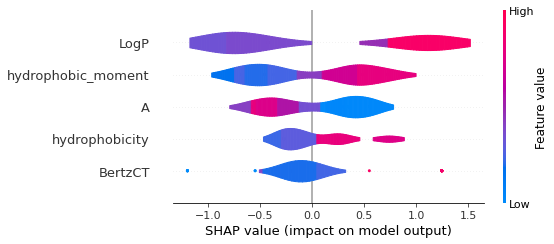

In [182]:
import shap
import matplotlib.pyplot as plt

# Select the top 5 features by name
top5_feature_names = top_features.index[:5]

# Extract SHAP values only for those features
shap_values_top5 = shap_df[top5_feature_names]

# Extract corresponding feature inputs
X_top5 = X_train[top5_feature_names]

# Plot SHAP distribution for the top 5 features
shap.summary_plot(
    shap_values_top5.values,
    X_top5,
    feature_names=top5_feature_names,
    plot_type='violin'     # distribution plot
)
